In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Sigmoid function

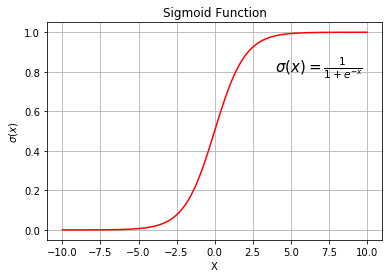

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.linspace(-10,10,100)

plt.plot(x, sigmoid(x), 'r', label='linspace(-10,10,10)')
plt.grid()
plt.title('Sigmoid Function')
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=15)
plt.xlabel('X')
plt.ylabel(r'$\sigma(x)$')

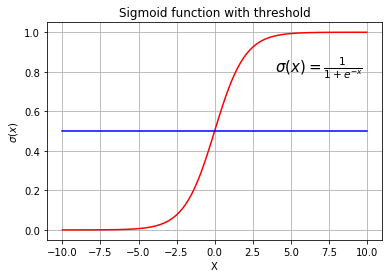

In [3]:
bx = [-10,10]
by = [.5, .5]

plt.plot(x, sigmoid(x), 'r', label='sigmoid function')
plt.plot(bx, by, 'b', label='boundary')
plt.grid()
plt.title('Sigmoid function with threshold')
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=15)
plt.xlabel('X')
plt.ylabel(r'$\sigma(x)$')

## Logistic Regression

In [4]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## We only consider 2 classes here, so we need to drop one class. We can use pandas to do that

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df = iris_df.astype({'target': int})
iris_df = iris_df[iris_df['target'] != 2]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df['target'].value_counts()

1    50
0    50
Name: target, dtype: int64

In [7]:
X = iris_df.drop(iris_df.columns[[4]], axis=1)
y = iris_df.drop(iris_df.columns[[0,1,2,3]], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [9]:
def intialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w, b

In [10]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [11]:
def trainModel(w, b, X, Y, learning_rate=0.0001, no_iterations=5001):
    costs = []
    m = X.shape[0]
    for i in range(no_iterations):
        # map the result to probability by sigmoid function
        a = sigmoid(np.dot(w,X.T)+b)
        
        # compute the neg log-likelihood
        cost = (-1/m)*(np.sum((Y.T*np.log(a)) + ((1-Y.T)*(np.log(1-a)))))
        
        # calculate the gradient
        dw = (1/m)*(np.dot(X.T, (a-Y.T).T))
        db = (1/m)*(np.sum(a-Y.T))
        
        # update w, b
        w = w - learning_rate*dw.T
        b = b - learning_rate*db
        
        if i%100==0:
            costs.append(cost)
        if i%500==0:
            print("%i iteration cost: %f" %(i, cost))
    
    # final result
    coef = {"w": w, "b": b}
    return coef, costs

In [12]:
def runModel(X_tr, y_tr, X_te, y_te, thershold=0.5):
    
    n_features = X_tr.shape[1]
    w, b = intialization(n_features)
    coef, costs = trainModel(w, b, X_tr, y_tr)
    
    w = coef['w']
    b = coef['b']
        
    y_tr_hat = np.array(sigmoid(np.dot(w,X_tr.T)+b)>thershold).astype(int)
    y_te_hat = np.array(sigmoid(np.dot(w,X_te.T)+b)>thershold).astype(int)
    
    print('Optimized weights:', w)
    print('Optimized intercept (b):',b)
    print('Training Accuracy',accuracy_score(y_tr_hat.T, y_tr))
    print('Test Accuracy',accuracy_score(y_te_hat.T, y_te))
    
    return costs

In [13]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2018)
y_tr = y_tr.as_matrix()
y_ts = y_te.as_matrix()
costs = runModel(X_tr, y_tr, X_te, y_te)

0 iteration cost: 0.693147
500 iteration cost: 0.669281
1000 iteration cost: 0.647651
1500 iteration cost: 0.627348
2000 iteration cost: 0.608077
2500 iteration cost: 0.589718
3000 iteration cost: 0.572206
3500 iteration cost: 0.555494
4000 iteration cost: 0.539537
4500 iteration cost: 0.524298
5000 iteration cost: 0.509737
Optimized weights: [[-0.0285358  -0.14982938  0.23780441  0.10081483]]
Optimized intercept (b): -0.023603139497049633
Training Accuracy 1.0
Test Accuracy 1.0


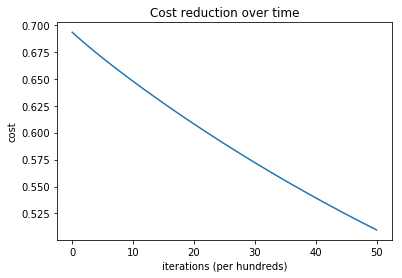

In [14]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')